In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from re import compile , match
import plotly.express as px


In [352]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [353]:
test=pd.read_csv("/content/drive/MyDrive/test.csv", sep=';')
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,81.86 bhp,113.75Nm@ 4000rpm,5.0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,52.8 bhp,85Nm@ 2500rpm,5.0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0


In [354]:
train=pd.read_csv("/content/drive/MyDrive/train.csv", sep=';')
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


In [355]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [356]:
train.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [357]:
#xóa dữ liệu bị nan
train = train.dropna()

In [358]:
#xóa dữ liệu trùng lặp
duplicate=train[train.duplicated()] 
duplicate

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
70,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09 kmpl,2993 CC,261.4 bhp,620Nm@ 2000-2500rpm,4.0
90,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
98,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
111,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
123,Maruti Baleno Alpha 1.3,2018,740000,38817,Diesel,Dealer,Manual,First Owner,27.39 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
5984,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
5985,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
5988,Tata Indigo eCS LX BSIV,2012,246000,35000,Diesel,Individual,Manual,Second Owner,23.03 kmpl,1396 CC,69 bhp,140Nm@ 1800-3000rpm,5.0


In [359]:
train.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [360]:
#rest index
train = train.reset_index(drop=True)
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5091,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5092,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5093,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


In [361]:
#sửa lại kiểu dữ liệu cho 1 số cột, xóa cột torque
#torque: The torque of the vehicle, for modelling purpose, this does not contain much information since they are rated at different rpm, so I will drop this feature.
train['owner'] = train['owner'].replace({"Test Drive Car":0,'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,"Fourth & Above Owner":4})
train['mileage'] = train['mileage'].apply(lambda x: float(x.split()[0]))
train['engine'] = train['engine'].apply(lambda x: float(x.split()[0]))
train['Brand'] = train['name'].apply(lambda x: x.split()[0])
train['max_power'] = train['max_power'].apply(lambda x: float(x.split()[0]))
train = train.drop('torque', 1)

In [362]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,108.50,5.0,Tata
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,88.76,5.0,Hyundai
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2982.0,168.50,7.0,Toyota
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,1,17.01,1591.0,121.30,5.0,Hyundai
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,1,18.00,1969.0,190.00,5.0,Volvo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,1,19.00,998.0,66.10,5.0,Maruti
5091,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,1,26.60,998.0,58.16,5.0,Maruti
5092,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,1,20.30,1199.0,84.00,5.0,Tata
5093,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,2,15.96,2523.0,63.00,9.0,Mahindra


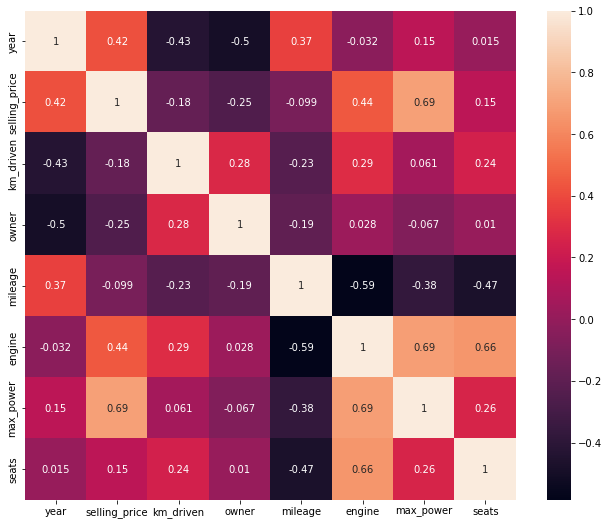

In [363]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr(), annot=True)

In [364]:
train.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,5095.000000,5.095000e+03,5.095000e+03,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,2013.667321,5.322568e+05,7.297031e+04,1.486948,19.467154,1436.708734,87.983228,5.444750
std,3.873214,5.325454e+05,5.301692e+04,0.726535,4.084521,498.796201,32.042123,0.997464
min,1994.000000,3.000000e+04,1.000000e+03,0.000000,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.700000e+04,1.000000,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.250000e+05,6.700000e+04,1.000000,19.500000,1248.000000,81.860000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,2.000000,22.540000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


# **EDA**

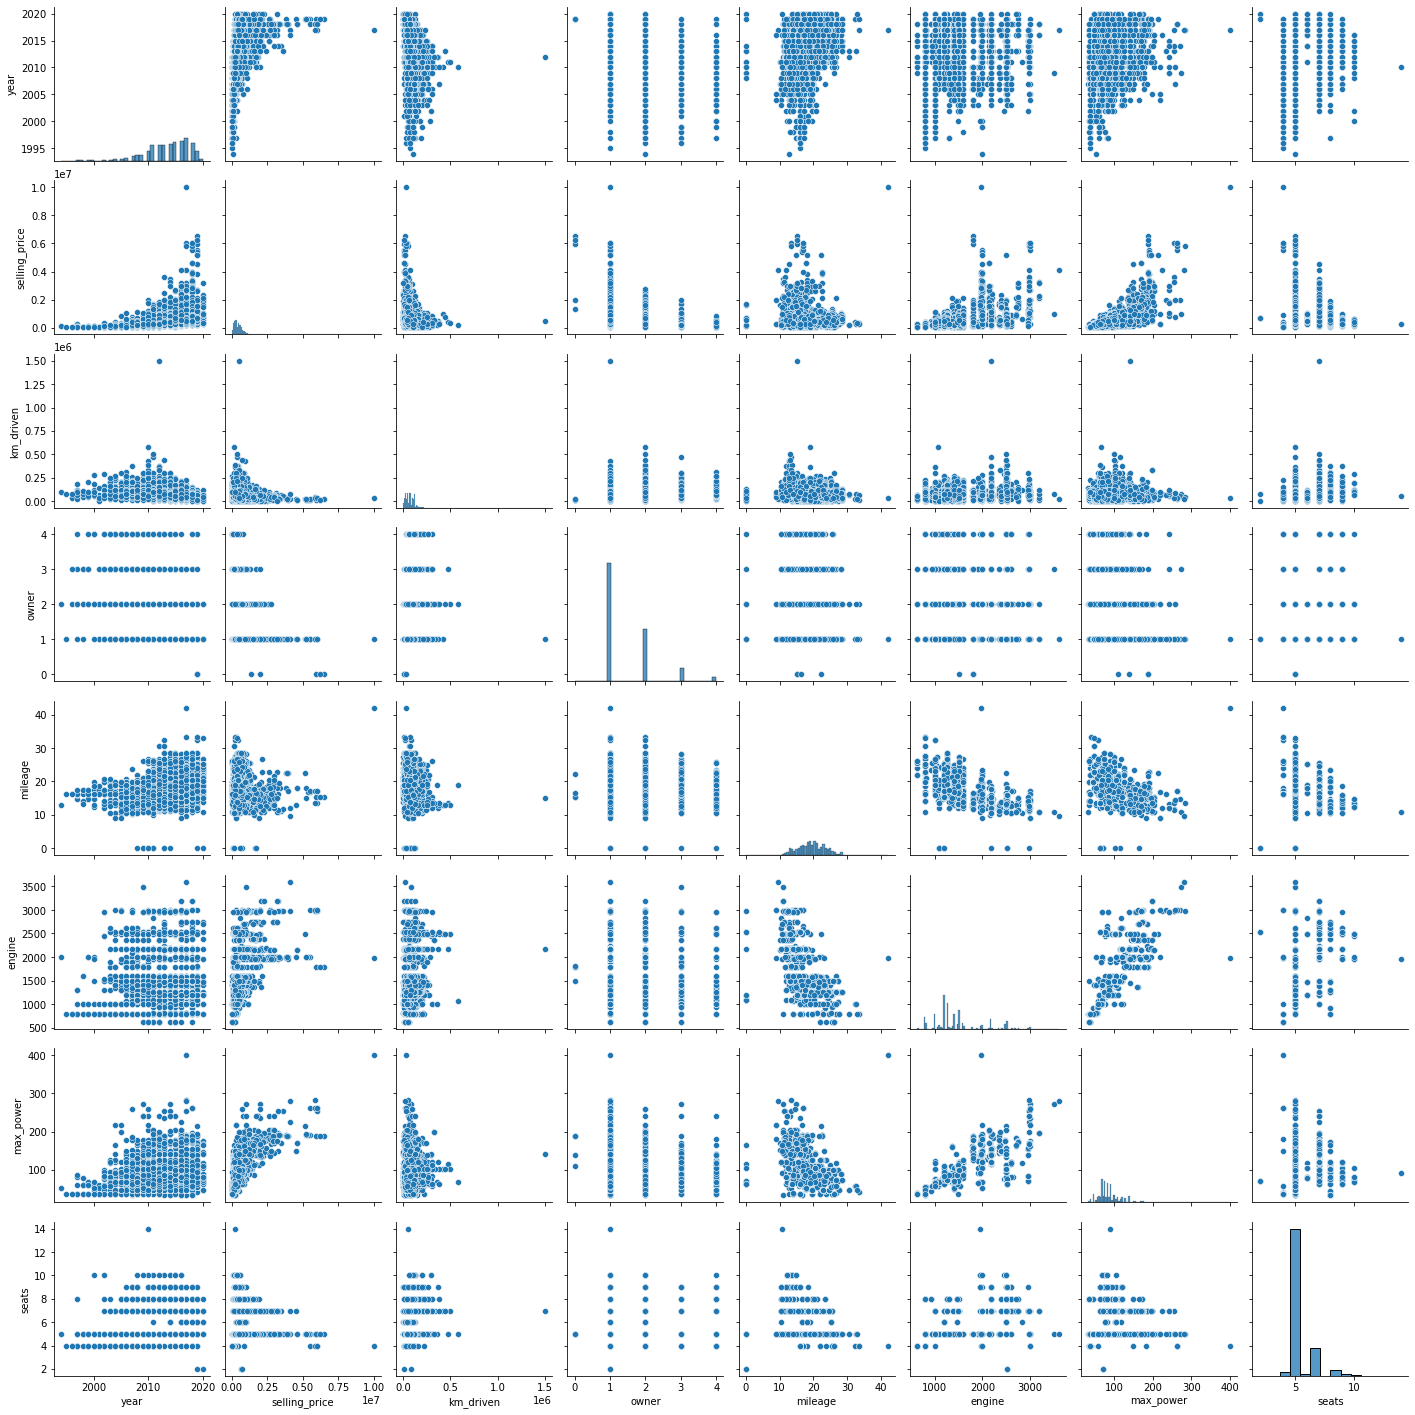

In [365]:
sns.pairplot(train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a6a01e050>,
      dtype=object)

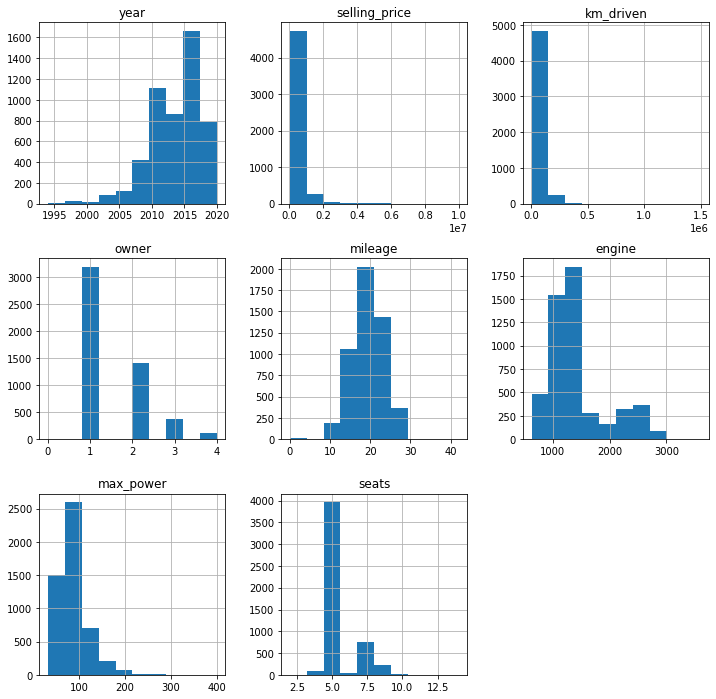

In [366]:
train.hist(figsize=(12,12),bins=10)

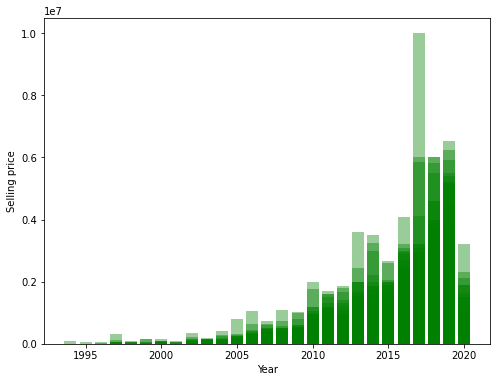

In [367]:
plt.figure(1, figsize=(8, 6))
plt.bar(train.year,train.selling_price, color='green',alpha=0.4)
plt.xlabel("Year")
plt.ylabel("Selling price")
plt.show()

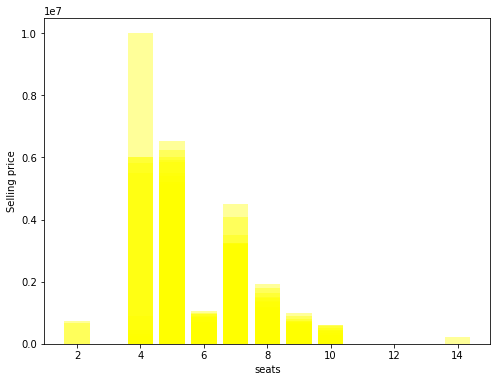

In [368]:
plt.figure(1, figsize=(8, 6))
plt.bar(train.seats,train.selling_price, color='yellow',alpha=0.4)
plt.xlabel("seats")
plt.ylabel("Selling price")
plt.show()

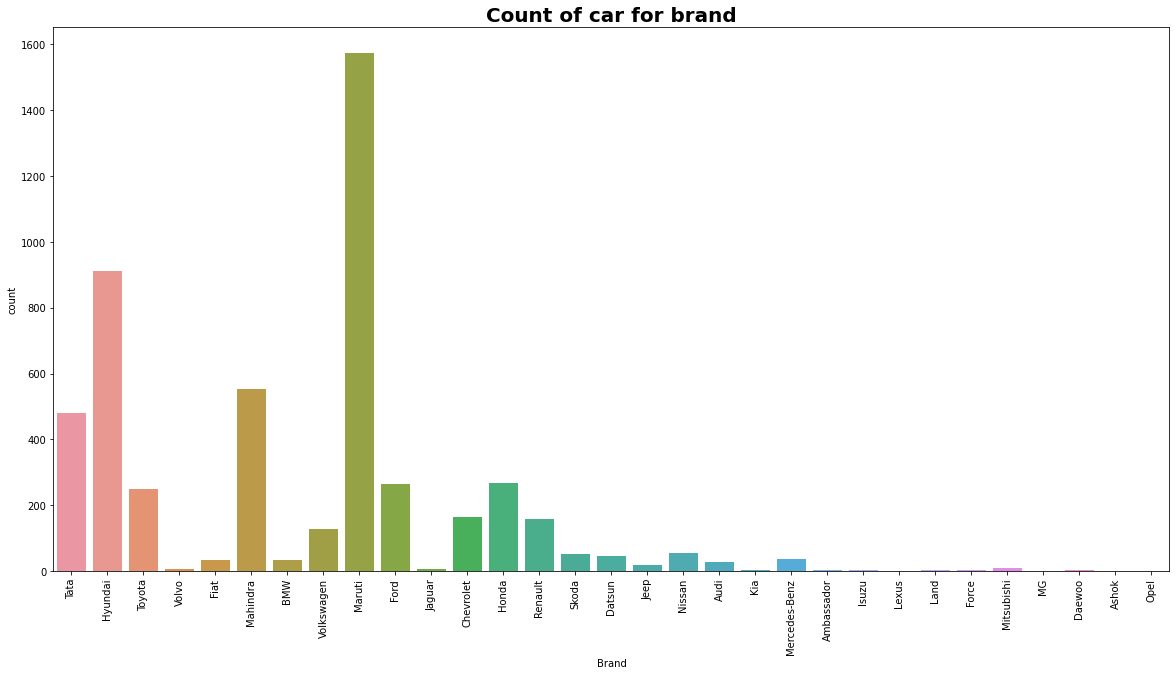

In [369]:
plt.figure(figsize=(20,10))
sns.countplot(x='Brand', data=train)
plt.title('Count of car for brand', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

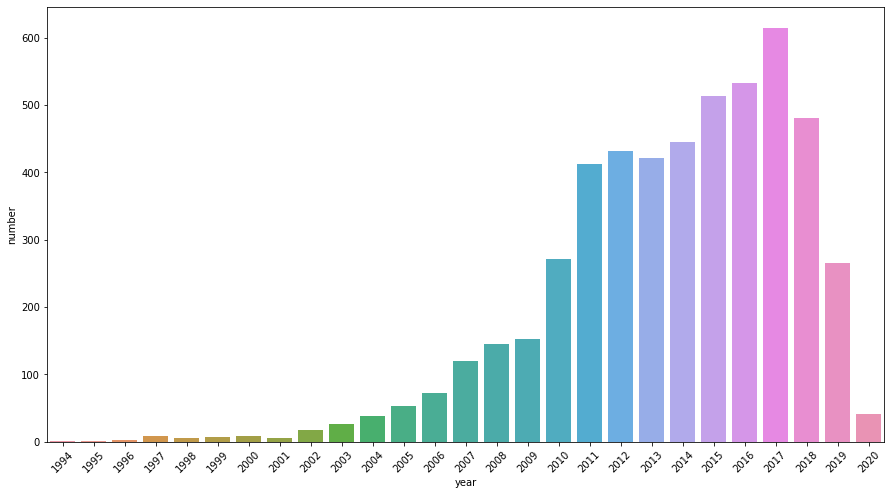

In [370]:
# Number of cars in each year

years = train['year'].value_counts()
years = pd.DataFrame(years).reset_index().rename(columns={'index': 'year', 'year': 'number'}).sort_values(by='year')
# years.head()

plt.figure(figsize = (15,8))
ax = sns.barplot(data=years, x='year', y='number')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

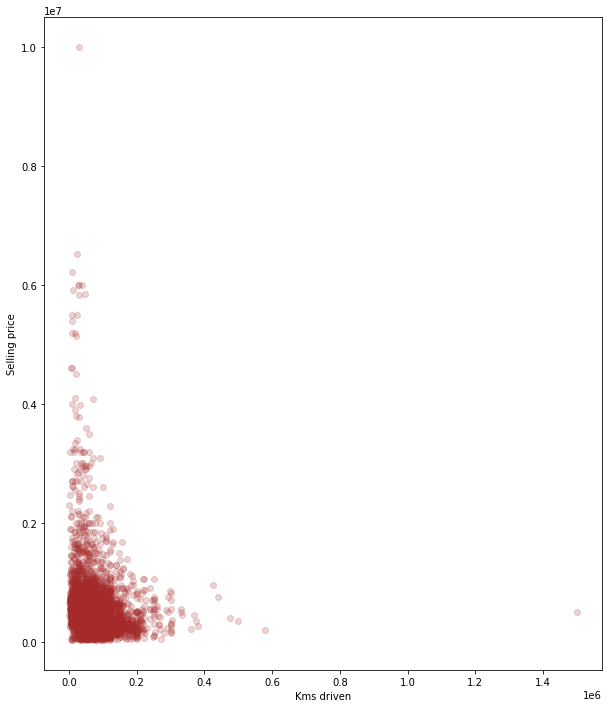

In [371]:
plt.figure(1, figsize=(10, 12))
plt.scatter(train.km_driven,train.selling_price, color='brown',alpha=0.2)
plt.xlabel("Kms driven")
plt.ylabel("Selling price")
plt.show()

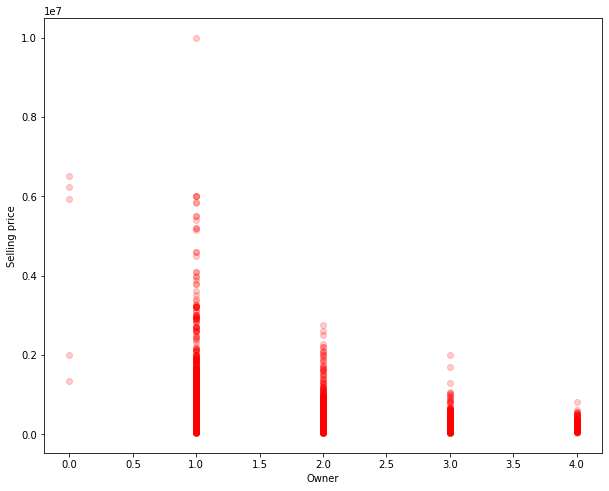

In [372]:
plt.figure(1, figsize=(10, 8))
plt.scatter(train.owner,train.selling_price, color='red',alpha=0.2)
plt.xlabel("Owner")
plt.ylabel("Selling price")
plt.show()

In [373]:
px.pie(data_frame = train ,names = train.fuel.value_counts().index,values = train.fuel.value_counts().values,title = "car fuel " ,hole = 0.7)

In [374]:
px.pie(data_frame = train ,names = train.owner.value_counts().index,values = train.owner.value_counts().values,title = "car owner " ,hole = 0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



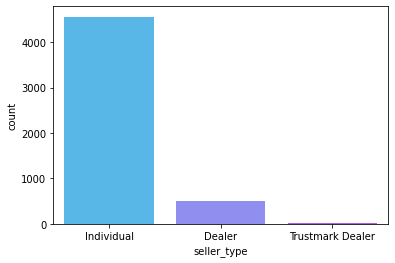

In [375]:
sns.countplot(train['seller_type'], palette='cool')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



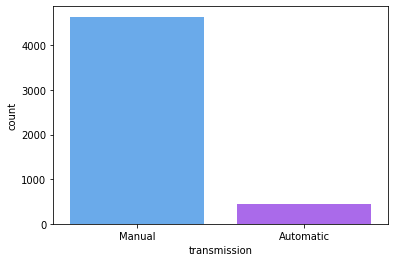

In [376]:
sns.countplot(train['transmission'], palette='cool')


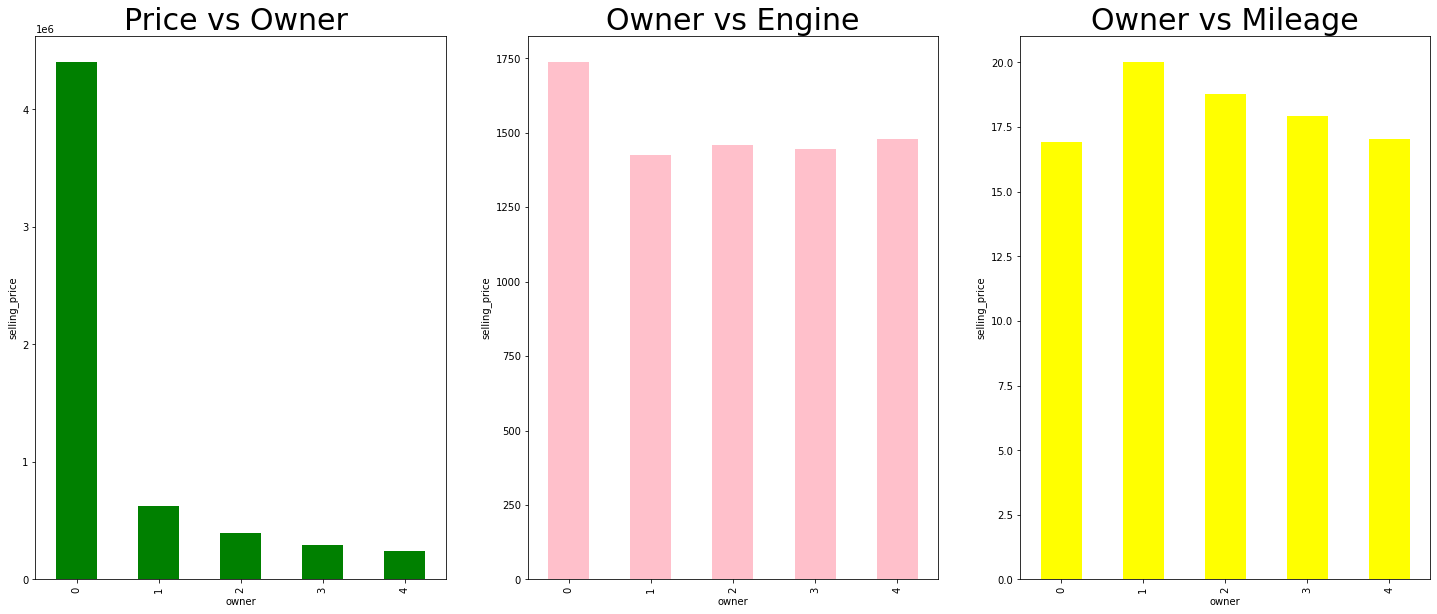

In [377]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Price vs Owner ',fontsize = 30)
plt.ylabel("selling_price")
train.groupby('owner')['selling_price'].mean().plot.bar(color="green")
plt.subplot(132)
plt.title('Owner vs Engine',fontsize = 30)
plt.ylabel("selling_price")
train.groupby('owner')['engine'].mean().plot.bar(color="pink")
plt.subplot(133)
plt.title('Owner vs Mileage',fontsize = 30)
plt.ylabel("selling_price")
train.groupby('owner')['mileage'].mean().plot.bar(color="yellow")

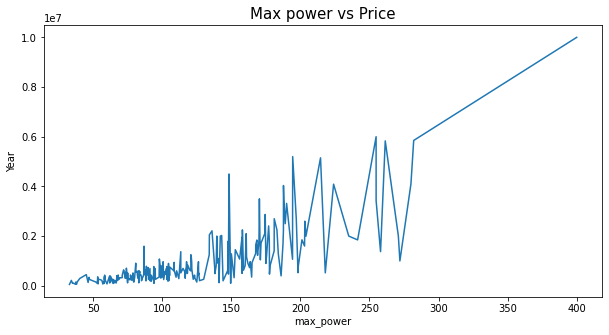

In [378]:
plt.figure(figsize=(10,5))
plt.title('Max power vs Price',fontsize = 15)
plt.ylabel("Year")
train.groupby('max_power')['selling_price'].mean().plot.line()

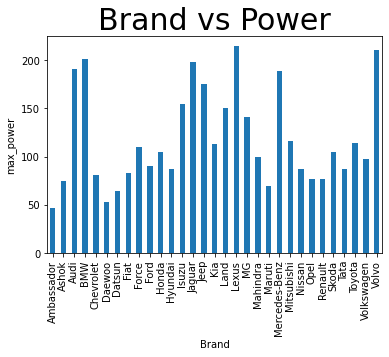

In [379]:
plt.title('Brand vs Power',fontsize = 30)
plt.ylabel("max_power")
train.groupby('Brand')['max_power'].mean().plot.bar()

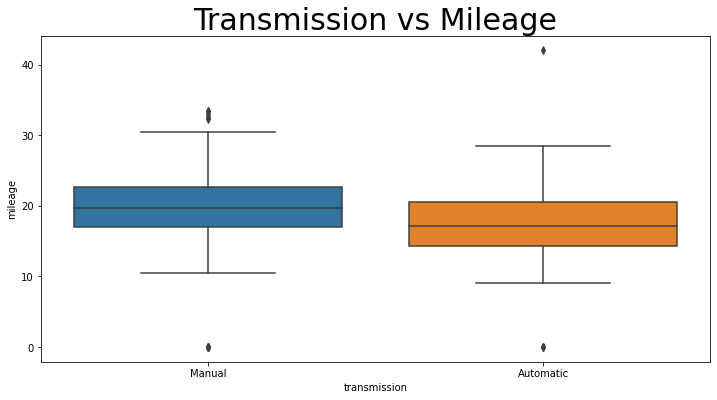

In [380]:
fig=plt.figure(figsize=(12,6))
plt.title('Transmission vs Mileage',fontsize = 30)
sns.boxplot(y='mileage',x='transmission',data=train)

In [381]:
#Thêm dữ liệu chênh lệch thời gian với hiện tại
train['now']=2021
train["new_time"]=train["now"]-train["year"]

In [382]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,now,new_time
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,108.50,5.0,Tata,2021,3
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,88.76,5.0,Hyundai,2021,3
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2982.0,168.50,7.0,Toyota,2021,6
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,1,17.01,1591.0,121.30,5.0,Hyundai,2021,6
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,1,18.00,1969.0,190.00,5.0,Volvo,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,1,19.00,998.0,66.10,5.0,Maruti,2021,11
5091,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,1,26.60,998.0,58.16,5.0,Maruti,2021,3
5092,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,1,20.30,1199.0,84.00,5.0,Tata,2021,3
5093,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,2,15.96,2523.0,63.00,9.0,Mahindra,2021,10


In [383]:
train=train.drop(["name","Brand",'now',"year","km_driven","mileage"], 1)


In [384]:
train = pd.get_dummies(data = train,drop_first=True) 

In [385]:
train

,selling_price,owner,engine,max_power,seats,new_time,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,850000,1,1497.0,108.50,5.0,3,1,0,0,1,0,1
1,750000,1,1396.0,88.76,5.0,3,1,0,0,1,0,1
2,1500000,2,2982.0,168.50,7.0,6,1,0,0,1,0,0
3,795000,1,1591.0,121.30,5.0,6,0,0,1,1,0,1
4,3800000,1,1969.0,190.00,5.0,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5090,235000,1,998.0,66.10,5.0,11,0,0,1,1,0,1
5091,390000,1,998.0,58.16,5.0,3,0,0,0,1,0,1
5092,450000,1,1199.0,84.00,5.0,3,0,0,1,1,0,1
5093,250000,2,2523.0,63.00,9.0,10,1,0,0,1,0,1


# **test**

In [386]:
test.head(2)

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0


In [387]:
test = test.drop('name', axis=1)
test = test.drop('Id', axis=1)
test = test.drop('torque', axis=1)

In [388]:
test['mileage'] = test['mileage'].str.replace(' kmpl','')
test['mileage'] = test['mileage'].str.replace(' km/kg','')
test['engine'] = test['engine'].str.replace(' CC','')
#test['max_power'] = test['max_power'].str.replace('0','112')
test['max_power'] = test['max_power'].str.replace(' bhp','')
test['owner'] = test['owner'].replace({"Test Drive Car":0,'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,"Fourth & Above Owner":4})

In [389]:
test['mileage'] = test['mileage'].astype(float)
test['engine'] = test['engine'].astype(float)
test['max_power'] = test['max_power'].astype(float)

In [390]:
test.isnull().sum()

year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
seats           62
dtype: int64

In [391]:
test["mileage"].fillna(test["mileage"].mean(),inplace=True)
test["engine"].fillna(test["engine"].mean(),inplace=True)
test["max_power"].fillna(test["max_power"].mean(),inplace=True)
test["seats"].fillna(test["seats"].mean(),inplace=True)

In [392]:
test['now']=2021
test["new_time"]=test["now"]-test["year"]

In [393]:
test.isnull().sum()

year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
now             0
new_time        0
dtype: int64

In [394]:
test=test.drop(['now',"year","km_driven","mileage"], 1)

In [395]:
test = pd.get_dummies(data = test,drop_first=True) 

In [396]:
test

,owner,engine,max_power,seats,new_time,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1,1598.0,103.50,5.0,5,0,0,1,0,0,0
1,1,1497.0,117.30,5.0,4,0,0,1,1,0,1
2,1,1197.0,82.00,5.0,7,0,0,1,1,0,1
3,1,2179.0,120.00,7.0,7,1,0,0,1,0,1
4,1,1498.0,98.96,5.0,6,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2123,1,1197.0,81.86,5.0,1,0,0,1,0,0,1
2124,2,1248.0,74.02,5.0,3,1,0,0,1,0,1
2125,2,1396.0,52.80,5.0,10,1,0,0,1,0,1
2126,2,1582.0,126.20,5.0,4,1,0,0,1,0,1


In [397]:
test

,owner,engine,max_power,seats,new_time,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1,1598.0,103.50,5.0,5,0,0,1,0,0,0
1,1,1497.0,117.30,5.0,4,0,0,1,1,0,1
2,1,1197.0,82.00,5.0,7,0,0,1,1,0,1
3,1,2179.0,120.00,7.0,7,1,0,0,1,0,1
4,1,1498.0,98.96,5.0,6,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2123,1,1197.0,81.86,5.0,1,0,0,1,0,0,1
2124,2,1248.0,74.02,5.0,3,1,0,0,1,0,1
2125,2,1396.0,52.80,5.0,10,1,0,0,1,0,1
2126,2,1582.0,126.20,5.0,4,1,0,0,1,0,1


In [398]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# **MODEL**

In [399]:
Y=train["selling_price"]
X=train.drop("selling_price", 1)

In [400]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


linear

In [401]:
reg = LinearRegression()

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print('MSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))
print('R-squared:', str(reg.score(x_test, y_test)))

MSE: 304664.41925168794
RMSE: 304664.41925168794
R-squared: 0.6375664550559024


In [402]:
pred = reg.predict(test)
pred

array([1183746.51452144,  880273.90602978,  434958.06697128, ...,
         90473.17306566,  981170.08247422,  493446.58878892])

ridge

In [403]:
from sklearn.linear_model import Ridge

mse = []

for a in np.arange(0, 1000, 10):

    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)

    mse.append(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))

data = {'Alpha': np.arange(0, 1000, 10), 'MSE': mse}

df = pd.DataFrame(data=data)

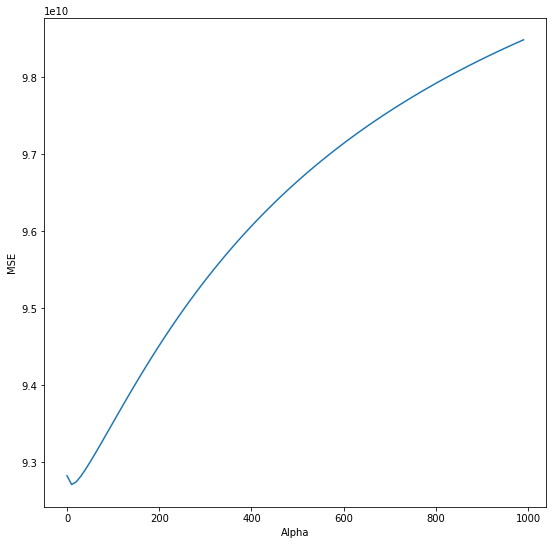

In [404]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.lineplot(x='Alpha', y='MSE', data=df)

In [405]:
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('MSE:', (metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))
print('R-squared:', str(ridge.score(x_test, y_test)))

MSE: 92706167317.24457
RMSE: 304476.87484806555
R-squared: 0.6380125292124382


SVR

In [406]:
a = StandardScaler().fit_transform(x_train)
b = StandardScaler().fit_transform(np.array(y_train).reshape(-1, 1))

svr = svm.SVR()
param = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

reg = GridSearchCV(svr, param_grid=param)
reg.fit(a, b)
reg.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

0.8037327429590763

In [407]:
reg.best_params_

{'C': 10, 'kernel': 'rbf'}

In [408]:
# SVR

from sklearn.svm import SVR

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.2))
regr.fit(x_train, y_train)

y1_pred = regr.predict(x_test)

print('R-squared:', str(regr.score(x_test, y_test)))
print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))

R-squared: -0.0340080070865898
MSE: 92706167317.24457
RMSE: 304476.87484806555


In [409]:
y1_pred

array([424788.67715626, 424691.67882318, 424434.67093996, ...,
       424944.66485538, 424546.83288283, 424815.00252919])

random forest

In [410]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print('R-squared:', np.sqrt(model.score(x_test, y_test)))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))


R-squared: 0.9568017691816061
MSE: 147134.3044124531
RMSE: 147134.3044124531


**in**

In [411]:
predicted = model.predict(test)
Sample = pd.DataFrame(data={'Id': np.arange(1, test.shape[0]+1), 'Predicted': predicted})

In [412]:
filename = 'd.csv'

Sample.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: d.csv
